# Solving a HANK model using the `IndShockConsumerType`

This notebook solves a Heterogeneous Agent model using HARK and computes Jacobians. These are used as inputs for the [Sequence-Space Toolbox](https://github.com/shade-econ/nber-workshop-2022)

Author: Adrian Monninger & Will Du

## TODO LIST
- Update construct_lognormal_income_process_unemployment in ConsIndShockModel.py
- Create "hh_ext" Block
- Add Steady State
- Add Jacobians
- 
- Allow for Monetary Policy Shock

## Archievement List
- Get Jacobians from ConsIndShockModel

## Open Questions
- How to Solve for GE Steady State: Can we just plug in the PE steady state? Our ss is with fixed r, beta. Do we have market clearance?

In [1]:
from ConsIndShockModel import IndShockConsumerType
import matplotlib.pyplot as plt
import numpy as np
import time

# Step 1: Partial Equilibrium using `IndShockConsumerType`

## 1. Solving `IndShockConsumerType`

In [2]:
#Steady State values

def fiscal_ss(B, r, G): 
    T = (1 + r) * B + G - B
    
    return T


r_ss = 1.03 - 1
G_ss = .2
B_ss = .5 # this is lower than the tutorial by Straub et al. because need Higher MPC
Y_ss = 1.0


T_ss = fiscal_ss(B_ss,r_ss,G_ss)

print('T_ss: ' +str(T_ss))

Z_ss = Y_ss - T_ss

C_ss= Y_ss - G_ss
print('Z_ss: ' +str(Z_ss))

print('C_ss: ' +str(Y_ss - G_ss))

T_ss: 0.21500000000000008
Z_ss: 0.7849999999999999
C_ss: 0.8


In [3]:
Dict={
    # Parameters shared with the perfect foresight model
    "CRRA": 2.0,                           # Coefficient of relative risk aversion
    "Rfree": 1.03,                         # Interest factor on assets
    "DiscFac": 0.96,                       # Intertemporal discount factor
    "LivPrb" : [0.98],                     # Survival probability
    "PermGroFac" :[1.01],                  # Permanent income growth factor
    
    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [0.1],                  # Standard deviation of log permanent shocks to income
    "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.2],                  # Standard deviation of log transitory shocks to income
    "TranShkCount" : 7,                    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.05,                     # Probability of unemployment while working
    "IncUnemp" : 0.3,                      # Unemployment benefits replacement rate
    "UnempPrbRet" : 0.0005,                # Probability of "unemployment" while retired
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "tax_rate" : 0.0,                      # Flat income tax rate (legacy parameter, will be removed in future)
    
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 1000,                       # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 200,                     # Number of points in the base grid of "assets above minimum"
    "aXtraNestFac" : 3,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraExtra" : [None],                 # Additional values to add to aXtraGrid
    
    # A few other paramaters
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool" : True,                    # Whether to calculate the value function during solution   
    "CubicBool" : False,                   # Preference shocks currently only compatible with linear cFunc
    "T_cycle" : 1,                         # Number of periods in the cycle for this agent type        
    
    # Parameters only used in simulation
    "AgentCount" : 10000,                  # Number of agents of this type
    "T_sim" : 120,                         # Number of periods to simulate
    "aNrmInitMean" : -6.0,                 # Mean of log initial assets
    "aNrmInitStd"  : 1.0,                  # Standard deviation of log initial assets
    "pLvlInitMean" : 0.0,                  # Mean of log initial permanent income
    "pLvlInitStd"  : 0.0,                  # Standard deviation of log initial permanent income
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor
    "T_age" : None,                        # Age after which simulated agents are automatically killed
    
    # HANK parameters
    "taxrate" : [0.0], # set to 0.0 because we are going to assume that labor here is actually after tax income
    "labor": [Y_ss - T_ss],
    "wage": [1.0],
}

In [4]:
# from https://github.com/wdu9/RA_test_work/blob/main/RA_test_work/HANK_model/Reproducing%20Fiscal%20Policy%20HANK.ipynb
# to add taxes, labor and wage

# Update def construct_lognormal_income_process_unemployment(self):
# similar to https://github.com/wdu9/RA_test_work/blob/main/RA_test_work/HANK_model/ConsIndShockModel_HANK.py

def function(taxrate, labor, wage):
    
    z = (1- taxrate)*labor*wage
    
    return z

Dict['TranShkMean_Func'] = function

In [5]:
Agent = IndShockConsumerType(**Dict)

## 2. Compute Steady State

In [6]:
start = time.time()
Agent.compute_steady_state()
print('Seconds to compute steady state', time.time() - start)

GPFRaw                 = 0.984539 
GPFNrm                 = 0.993777 
GPFAggLivPrb           = 0.964848 
Thorn = APF            = 0.994384 
PermGroFacAdj          = 1.000611 
uInvEpShkuInv          = 0.990704 
VAF                    = 0.932054 
WRPF                   = 0.213705 
DiscFacGPFNrmMax       = 0.972061 
DiscFacGPFAggLivPrbMax = 1.010600 


Seconds to compute steady state 7.635278940200806


## 3. Compute Jacobians for Shock to Standard Deviation to Permanent Income Shocks
See [Jacobian Notebook](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/IndShockConsumerType_Jacobian_Example.ipynb)
Shocks possible: LivPrb, PermShkStd,TranShkStd, DiscFac,UnempPrb, Rfree, IncUnemp, DiscFac



In [7]:
start = time.time()

CJAC_Perm, AJAC_Perm = Agent.calc_jacobian('PermShkStd',200)

print('Seconds to calculate Jacobian', time.time() - start)

200
Seconds to calculate Jacobian 5.311161279678345


Plot: Consumption Jacobians

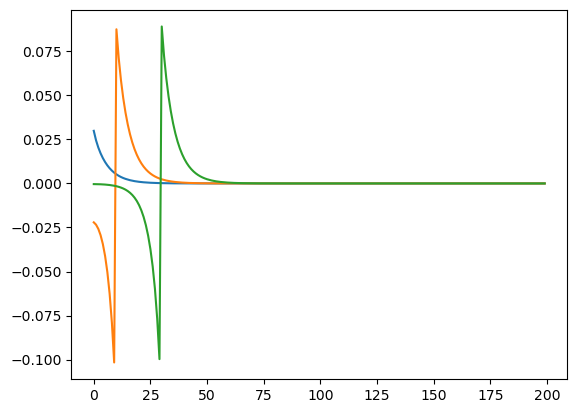

In [8]:
plt.plot(CJAC_Perm.T[0])
plt.plot(CJAC_Perm.T[10])
plt.plot(CJAC_Perm.T[30])
plt.show()

### Get Household Poblem into a Block structure such that SSJ can use it

In [ ]:
# create hh
# From 

# {'backward_fun': <ExtendedFunction(hh): ['Va_p', 'a_grid', 'we', 'T', 'r', 'beta', 'eis', 'frisch', 'vphi'] -> ['Va', 'a', 'c', 'n']>, 
# 'name': 'hh', 'M': Bijection({}), 'steady_state_options': {'backward_tol': 1e-08, 'backward_maxit': 5000, 'forward_tol': 1e-10, 'forward_maxit': 100000}, 
# 'impulse_nonlinear_options': {'monotonic': False}, 'impulse_linear_options': {'h': 0.0001, 'twosided': False}, 
# 'jacobian_options': {'h': 0.0001, 'twosided': False}, 'partial_jacobians_options': {}, 'exogenous': OrderedSet(['Pi']), 'policy': OrderedSet(['a']), 
# 'backward': OrderedSet(['Va']), 'non_backward_outputs': OrderedSet(['a', 'c', 'n']), 'outputs': OrderedSet(['A', 'C', 'N']), 
# 'M_outputs': Bijection({'a': 'A', 'c': 'C', 'n': 'N'}), 'inputs': OrderedSet(['a_grid', 'we', 'T', 'r', 'beta', 'eis', 'frisch', 'vphi', 'Pi']), 
# 'internals': OrderedSet(['D', 'Dbeg', 'Pi', 'Va', 'a', 'c', 'n']), 'original_inputs': OrderedSet(['a_grid', 'we', 'T', 'r', 'beta', 'eis', 'frisch', 'vphi', 'Pi']), 
# 'original_outputs': OrderedSet(['A', 'C', 'N']), 'original_internals': OrderedSet(['D', 'Dbeg', 'Pi', 'Va', 'a', 'c', 'n']), 'original_M_outputs': Bijection({'a': 'A', 'c': 'C', 'n': 'N'}), 
# 'hetinputs': None, 'hetoutputs': None, 'backward_init': <ExtendedFunction(hh_init): ['a_grid', 'we', 'r', 'eis', 'T'] -> ['fininc', 'Va']>}


hh = {'name' : 'hh',
    'inputs' : ['a_grid', 'we', 'T', 'r', 'beta', 'eis', 'frisch', 'vphi', 'Pi'],
    'outputs' : = ['A', 'C', 'N']
    
}

In [ ]:
hh_ext = {
    inputs = OrderedSet(['r', 'beta', 'eis', 'frisch', 'vphi', 'rho_e', 'sd_e', 'nE', 'amin', 'amax', 'nA', 'Div', 'Tax', 'w'])
    outputs = ['A', 'C', 'N', 'NE']
    partial_jacobians = 
    steady_state = 
}

In [ ]:
# Add Steady State.
## I found in blocks/block:
"""
    def steady_state(self, calibration: Union[SteadyStateDict, UserProvidedSS], 
                     dissolve: List[str] = [], options: Dict[str, dict] = {}, **kwargs) -> SteadyStateDict:
"""
hh_ext['UserProvidedSS'] = {}

In [ ]:
# Add Jacobian
JacobianDict = {
    
}

In [11]:
J_ha = 
CJAC_Perm.shape

(200, 200)

In [9]:
stop

NameError: name 'stop' is not defined

# Step 2: General Equilibrium Part Using Sequence Space Method
Following the [SSJ](https://github.com/shade-econ/sequence-jacobian/blob/master/notebooks/hank.ipynb) and creating other market participants as simple blocks

In [ ]:
@simple
def firm(Y, w, Z, pi, mu, kappa):
    L = Y / Z
    Div = Y - w * L - mu/(mu-1)/(2*kappa) * (1+pi).apply(np.log)**2 * Y
    return L, Div


@simple
def monetary(pi, rstar, phi):
    r = (1 + rstar(-1) + phi * pi(-1)) / (1 + pi) - 1
    return r


@simple
def fiscal(r, B):
    Tax = r * B
    return Tax


@simple
def mkt_clearing(A, NE, C, L, Y, B, pi, mu, kappa):
    asset_mkt = A - B
    labor_mkt = NE - L
    goods_mkt = Y - C - mu/(mu-1)/(2*kappa) * (1+pi).apply(np.log)**2 * Y
    return asset_mkt, labor_mkt, goods_mkt


@simple
def nkpc_ss(Z, mu):
    w = Z / mu
    return w

@simple
def nkpc(pi, w, Z, Y, r, mu, kappa):
    nkpc_res = kappa * (w / Z - 1 / mu) + Y(+1) / Y * (1 + pi(+1)).apply(np.log) / (1 + r(+1))\
               - (1 + pi).apply(np.log)
    return nkpc_res

Partial Equilibria for maro blocks

In [ ]:
## Put Blocks together
blocks = [hh_ext, firm, monetary, fiscal, mkt_clearing, nkpc]
hank = create_model(blocks, name="One-Asset HANK")

In [ ]:
## Steady States
ss = hank.steady_state(ss0)

for k in ss0.keys():
    assert np.all(np.isclose(ss[k], ss0[k]))

In [ ]:
## Solve Jacobians
## NOTE: our HARK Jacobians are already included and are just used as given
# setup
T = 300
exogenous = ['rstar', 'Z']
unknowns = ['pi', 'w', 'Y']
targets = ['nkpc_res', 'asset_mkt', 'labor_mkt']

# general equilibrium jacobians
G = hank.solve_jacobian(ss, unknowns, targets, exogenous, T=T)

print(G)

### a) Combining Partial Equilibrium Jacobians to make them General Equilibrium. Instead of using `CombinedBlock`

In [ ]:
J_r_rante = models['ha']['ex_post_rate'].jacobian(ss['ha'], ['r_ante'], T=T)['r']['r_ante']
J_C_r = models['ha']['hh'].jacobian(ss['ha'], ['r'], T=T)['C']['r']

dC_dr_manual = J_C_r @ J_r_rante @ dr

assert np.all(np.isclose(dC_dr['ha'], dC_dr_manual))


### b) Using linear solution methods (`impulse_linear`, `jacobian` and their `solved_` versions) at the macro model level.